In [1]:
import machnamh
from machnamh import helper
#pandas, ipywidgets and sklearn used for training a logistic regression model
import pandas as pd
import ipywidgets as widgets
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output, HTML

<font size="5"> <span style="color:green">Use the Machnamh library to reload the transformed data and the transformation summary</span></h2> 

<font size="2">
- Set the paths to the data
- Reload the pandas dataframe and the data_summary object
- For this example we will use Logistic regression to train the model therefor we will call the "mh.set_decision_boundary(data_frame, data_summary)" function

In [2]:
#create the helper_methods object
mh = helper.helper_methods()
# s = pre_process.self_info_class()
# print (s)
# s.describe()

# Set the paths where the files generated in step_one were stored.
report_path = "/Users/aideenf/Documents/GitHub/machnamh/machnamh/transformed_data/report_law_data.csv.html"
data_summary_path = "/Users/aideenf/Documents/GitHub/machnamh/machnamh/transformed_data/transformed_31_08_2020_law_data_summary.pickle"
data_frame_path = "/Users/aideenf/Documents/GitHub/machnamh/machnamh/transformed_data/transformed_31_08_2020_law_data.csv"

data_summary_path = '/Users/aideenf/Documents/GitHub/machnamh/machnamh/demo_jupyter_notebooks/transformed_data/transformed_01_09_2020_law_data_summary.pickle'




'''Reload the files that were saved during step_one of the process i.e the transformed 
 pandas dataframe and the "data_summary" object which contains all other relevant
 information '''
#Setting print_summary = True will display a simmary of the data_summary object
#which contains all of the information relating to the data transformation in step_one.
data_frame, data_summary = mh.reload_data(data_summary_path, 
                                          data_frame_path, 
                                        print_summary = False)




''' Use the 'set_decision_boundary' function call to set a decision boundary for what constitutes label 0
and label 1  if the original Target has been a continuous variable and you require
a binary target for the machine learning algorithm you wish to use e.g 
a Logistic Regression model which is what we will use for this example.'''
mh.set_decision_boundary(data_frame, data_summary)


<IPython.core.display.Javascript object>

Output()

<font size="5"> <span style="color:green">Use the Machnamh library to retrieve the X and y data for Train/Test/Validate</span></h2> 

<font size="2">
    
- The <b>training_features</b> list returned contains a list of the features to be used for training.
    
- The input <b>include_protected</b> is set to <span style="color:green"><b>True</b></span> if we want to use the protected fetures for training.
    
- The <b>continuous_to_binary_target</b> when set to <span style="color:green"><b>True</b></span> indicates that although a continuous target exists we will use the binary target as set by the decision boundary.
    
- The decision boundary for converting the continuous target to a
binary target can be set using the <b>set_decision_boundary</b> function

- Right now we can include all protected in training, or none(True/False).
    
<font size="2">
<span style="color:orange">Note that we will use the "training_features_list" returned in this call when we *train * the ML algorithm of our choice, we will NOT filter by this list when we are *splitting* the data, or at any other point, as we wish to ensure that all the columns(including the protected) remain in synch for ranking and during analysis"</span>
    

In [4]:
X, y, training_features_list = mh.get_features_and_target(data_frame, 
                                                            data_summary, 
                                                            include_protected = True,
                                                            continuous_to_binary_target = True)

 <font size="6"> <span style="color:green">Train a Machine learning model - independant of Machnamh library</span></h2> 
<font size="2">
- Create train/test split  +  Logistic Regression + Return probability score. 
- Logistic regression is a machine learning model that uses a logistic function to model a binary dependent variable. Although there are better models in terms of performance or ranking (a.o. boosting methods, random forest, deep neural networks), logistic regression provides coefficients which are very easy to interpret.
- For demonstration purposes, logistic regression is used here.
- From a ranking perspective the ranking may be applied to the probability score returned from the logistic 
regression model. 
    
<font size="3">For the purpose of demonstration a Binary Logistic Regression model will be trained, the output will be ranked based on the probability score for class 1. 
    
<font size="2"><span style="color:red"> Note that in the sklearn.model_selection train_test_split" function <b>X</b> is used <b>without</b> any filtering via "training_features_list". This is in order to ensure that all columns remain synchronised for analysis. Keep this in mind regardless of how you will split the data.
<br>
 
<span style="color:red">In the <b>.fit</b> function however we use <b>X_train[training_features]</b>  
 

[LibLinear]We are expecting this to be in order 0, 1: [0.0, 1.0]


'*****EVALUATING MODEL WITH TRAINING DATA:***'

' Root mean squared error: 0.2720596076723566'

' R2 score: -0.0882580417413732'

'*****EVALUATING MODEL WITH TEST DATA:******'

' Root mean squared error: 0.2724409797017426'

' R2 score: -0.09028177863948095'

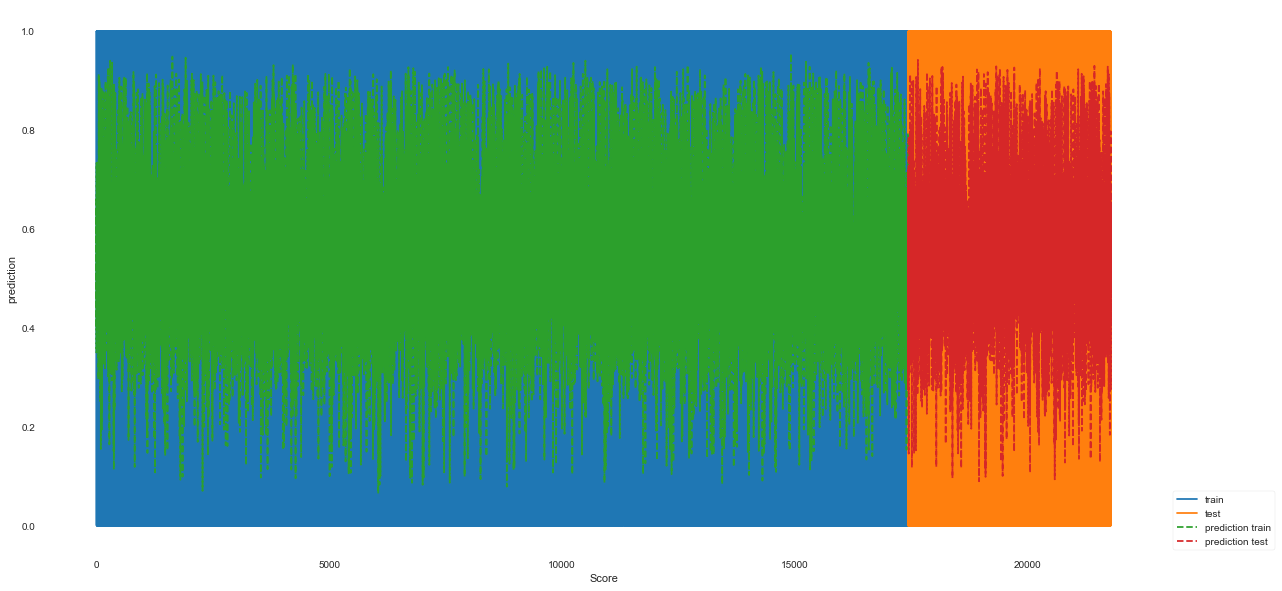

              precision    recall  f1-score   support

         0.0       0.63      0.53      0.58      8753
         1.0       0.59      0.69      0.64      8679

    accuracy                           0.61     17432
   macro avg       0.61      0.61      0.61     17432
weighted avg       0.61      0.61      0.61     17432



              precision    recall  f1-score   support

         0.0       0.65      0.53      0.58      2227
         1.0       0.59      0.70      0.64      2132

    accuracy                           0.61      4359
   macro avg       0.62      0.62      0.61      4359
weighted avg       0.62      0.61      0.61      4359






interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Decision boundary', max=1.0…

In [5]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

# Remember here not to filter the columns as we want them to retain
# correctorder even if we will not use all columns for training
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0, 
                                                    test_size = 0.20)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True) 
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)



#Now when training remember here to filter the X_train by only the training features we have
#set in 'training_features' which was returned from the helper method mh.get_features_and_target()
logistic_reg_model = LogisticRegression(solver = "liblinear", 
                                        verbose = 1, 
                                        random_state=0, 
                                        max_iter = 3000).fit(X_train[training_features_list],
                                                             y_train.values);



# This is the prediction for each class(0,1). Note that for each row it returns 
# the probability of 1 and of 0 [P1 P0] and the total probability is equal to one. 
# Returns the probability of the sample for each class in the model, 
# where classes are ordered as they are in self.classes_.
y_train_prob_0_1 = logistic_reg_model.predict_proba(X_train[training_features_list])
y_test_prob_0_1 = logistic_reg_model.predict_proba(X_test[training_features_list])

y_train_prob_1 = pd.DataFrame(y_train_prob_0_1)[1]
y_test_prob_1 = pd.DataFrame(y_test_prob_0_1)[1]


print ("We are expecting this to be in order 0, 1:", list(logistic_reg_model.classes_))
#Get the probability for y_actual, get probability for Y_class_1
def get_probabilitie_of_actual(y_actual, y_prob):
    y_actual_prob = []

    for i in range(len(y_actual)):
        if y_actual[i] == 0:
            y_actual_prob.append(y_prob[i][0])
            
        if y_actual[i] == 1:
            y_actual_prob.append(y_prob[i][1])
            
    return pd.Series(y_actual_prob)


y_train_prob_actual = get_probabilitie_of_actual(y_train, y_train_prob_0_1)


y_test_prob_actual = get_probabilitie_of_actual(y_test, y_test_prob_0_1)

display (HTML("<h3>Graph of accuracy for Training and Test Logistic Regression</h3>"))
#prob actual shows the probability of whatever y_train or y_test actual value is


plot_outcome = mh.visualise_RMSE_model_eval(y_train, 
                                                    y_test, 
                                                    y_train_prob_actual, 
                                                    y_test_prob_actual)
plot_outcome.show()


#########RANK THE DATA ACCORDING TO THE pred_prob_1 values ###########################
def rank_with_prob_1(X, 
                     y_actual,
                     y_prob_actual,
                     y_prob_1,
                     ):
    
    cols = X.columns
    pd.set_option("display.precision", 10)
    X[y_actual.name] = y_actual
    X["y_prob_actual"] = y_prob_actual
    X["prob_1"] = y_prob_1
    X.reset_index(drop = True, inplace = True)
    X.sort_values(by ='prob_1', ascending=False, inplace = True )
    X.reset_index(drop = True, inplace = True)
    #returns X, y, predic
    return X[cols], pd.Series(X[y_actual.name]), pd.Series(X['y_prob_actual']), pd.Series(X['prob_1'] )  


X_train, y_train, y_train_prob_actual, y_train_prob_1 = rank_with_prob_1(X_train,
                                                                         y_train,
                                                                         y_train_prob_actual,
                                                                         y_train_prob_1
                                                                         )

X_test, y_test, y_test_prob_actual, y_test_prob_1 = rank_with_prob_1(X_test,
                                                                     y_test,
                                                                     y_test_prob_actual,
                                                                     y_test_prob_1
                                                                    )


display (HTML("<h3>Logistic Regression Classification report with decision boundary 0.5</h3>Using the sklearn predict function"))
# The classification_report matrix defaults to decision boundary of .5 ?
display (HTML("<h4>Training data</h4>"))
print(classification_report(y_train, logistic_reg_model.predict(X_train[training_features_list])))

display (HTML("<h4>Test data</h4>"))
print(classification_report(y_test, logistic_reg_model.predict(X_test[training_features_list])))
print("")
print("")
print("")

display (HTML("<h3>Logistic Regression Classification report with Modified decision boundary</h3>Using own local method"))
local_style = {'description_width':'initial'}

decision_boundary = 0
y_train_pred = pd.Series(dtype='float64')
y_test_pred = pd.Series(dtype='float64')

def predict_with_boundary(pred_prob_1,
                          y,
                          boundary = 0.5):

    y_pred = []
    for x in range(len(pred_prob_1)):
        if pred_prob_1[x] >= boundary:
            y_pred.append(1)
        else:
            y_pred.append(0)    
    y_pred = pd.Series(y_pred)
    # When true positive + false positive == 0, precision is undefined; 
    # When true positive + false negative == 0, recall is undefined. 
    # In such cases, by default the metric will be set to 0, as will f-score, 
    # and UndefinedMetricWarning will be raised.
    print (classification_report(y, y_pred))

    return y_pred

y_test_pred = ''
y_train_pred = ''
def modify_boundary (x):
    global decision_boundary
    global y_train_pred
    local_style = {'description_width':'initial'}
    local_layout = {'width': 'auto', 'visibility':'visible'}
    decision_boundary = x
    
    display (HTML("<h4>Training data </h4> decision boundary: " + str(x)))
    
    y_train_pred = predict_with_boundary(y_train_prob_1,
                          y_train,
                          boundary = x);
    
    
    change = widgets.Button(description="Apply Boundary to Test Data", style = local_style, layout = local_layout)
    button_output = widgets.Output()
    def on_button_clicked(b):
        with button_output:
            clear_output(wait = True)
            global y_test_pred
            display (HTML("<h4>Test data</h4> decision boundary: " + str(x)))
            y_test_pred = predict_with_boundary(y_test_prob_1,
                                  y_test,
                                  boundary = x);
            
                            
    change.on_click(on_button_clicked)            
    display(change, button_output)

    

interact(modify_boundary, x=widgets.FloatSlider(min=0, max=1, description = "Decision boundary",
                                       continuous_update=False, 
                                       step=0.01, value=0.5,
                                       style = local_style));

<font size="5"> <span style="color:orange">Now we have the ranked training and test data (with y predict and probability of being of type class 1)</span> 
<font size="2"><br>
Ranked according to the probability of being of type Class 1

<font size="5"> <span style="color:green">Use Machnamh function to analyse fairness and accuracy of the model output with Aequitas</span></h2> 
<font size="2">
 
 The Machnamh "aequitas_fairness_metrics" function uses the Aequitas API and provides a graphical output to interpret several fairness metrics.<br>
    
 At this point for both Training and Test data we have:<br>
 X_train:  <br>
 y_train: The target. <br>
 y_test_prob_actual: The probability of being the actual target(1 or 0).<br>
 y_test_prob_1: The probability of being class 1, the ranking is based on this<br> 
 y_train_pred: The output (Class 1 or 0, depending on the decision boundary).<br>

In [6]:
mh.view_aequitas_fairness_metrics(X_train, 
                                  y_train, 
                                  y_train_pred,
                                  data_summary)


model_id, score_thresholds 0 {'rank_abs': [10140]}


<font size="5"> <span style="color:green">Use Machnamh function to provide graphical representation of model interpretability provided by SHAP library</span></h2> 
<font size="2">
 
SHAP can be used to show how much each input feature contributes either positively or negatively to the output of the trained model.
<br>
    The Machnamh <b>"run_shap_and_serialise_response"</b> function uses the SHAP library to obtain the shap explainer and shap values, in the background it uses the SHAP model agnostic function "KernelExplainer". 
<br>
The inputs to this function are:
- The X_train dataframe filtered using <b>[training_features_list]</b>, <span style="color:red">note, we only include the feature columns that were used for training.</span>
- The .predict function from the model in question, in this case our logistic_reg_model.
- The number of samples to use, the reccomended is 100, although here we use 500. The more samples that are used the longer the function will take to complete. 
     
<br>As this function can take some time to complete the function also serialises the results so they may be retrieved and reviewed at a later time. See SHAP documentation for further details on SHAP and the KernelExplainer function:<br>https://github.com/slundberg/shap.<br>https://shap.readthedocs.io/en/latest/#.

    
 The Machnamh <b>reload_shap_data(shap_path)</b> function can be used to retrieve the output from "run_shap_and_serialise_response".<br>
    
The Machnamh <b>shap_analysis</b> function may then be called to review the explainability user interface.


In [ ]:
explainer, shap_values, x = mh.run_shap_and_serialise_response(X_train[training_features_list],
                                                         logistic_reg_model.predict,
                                                          500, 
                                                          save_to_path = './output')

In [9]:
shap_path = "./output"
# Reload the file
shap_values, explainer, x =  mh.reload_shap_data(shap_path)
# use the helpe method to run the shap analysis.
mh.shap_analysis(shap_values, explainer, x, data_summary)

Output()

<font size="5"> <span style="color:green">Serialise the ranked list for analysis.</span><br>
<font size="2">
Serialising the ranked list so that we may use a separate notebook for Step Three - Analyse the ranking for fairness. <br>The following values will be serialised:
- X_train: pandas dataframe containing the training data <br>
- y_train: The target, data type Series <br>
- y_traint_prob_actual: The probability of being the actual target(1 or 0), data type Series.<br>
- y_train_prob_1: The probability of being class 1, the ranking is based on this, data type Series<br> 
- y_train_pred: The output (Class 1 or 0, depending on the decision boundary).<br>
All steps should be completed for train/test/validate however for the purpose of the dempo we are concentrating
on the training data only.

In [10]:
mh.serialise_ranked_list(X_train,
                        y_train,
                        y_train_prob_actual,
                        y_train_prob_1,
                        y_train_pred,
                         "./output/"
                        "train")

'./output/train_ranked_data.pickle'